In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Linearly Seperable synthetic 2D dataset

In [6]:
np.random.seed(0)
num_samples=100

class1_x = np.random.uniform(0, 5, num_samples)
class1_y = np.random.uniform(0, 2*class1_x + 1, num_samples)

class2_x = np.random.uniform(5, 10, num_samples)
class2_y = np.random.uniform(2*class2_x + 1, 15, num_samples)

[]

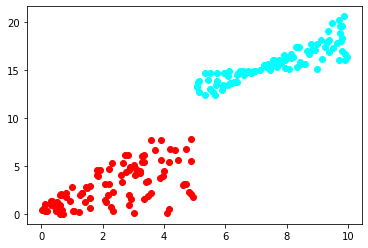

In [8]:
plt.scatter(class1_x, class1_y, c="red")
plt.scatter(class2_x, class2_y, c="cyan")
plt.plot()

### Non Linearly Seperable synthetic 2D dataset

In [21]:
np.random.seed(0)
num_samples=100
theta=np.linspace(0, 2*np.pi, num_samples)
radius = 2 + np.random.randn(num_samples) * 1
class1_x = radius * np.cos(theta) + np.random.randn(num_samples)
class1_y = radius * np.sin(theta) + np.random.randn(num_samples)

theta = np.linspace(0, 2*np.pi, num_samples)
radius = 7 + np.random.randn(num_samples) * 1.5
class2_x = radius * np.cos(theta) + np.random.randn(num_samples)
class2_y = radius * np.sin(theta) + np.random.randn(num_samples)

[]

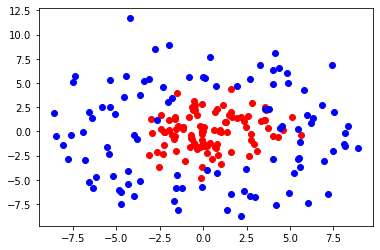

In [23]:
plt.scatter(class1_x, class1_y, c="red")
plt.scatter(class2_x, class2_y, c="blue")
plt.plot()